# Actividad


---
Por: Ángela Córdoba


---




In [1]:
# Importación de librerías
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
from statsmodels.tsa.seasonal import seasonal_decompose

In [2]:
# Generación de datos de ejemplo
np.random.seed(0)
dates = pd.date_range(start='2022-01-01', end='2022-12-31')
values = np.arange(len(dates))*0.2 + np.random.rand(len(dates))*50
ts = pd.Series(values, index=dates)

In [3]:
# Dividir los datos en entrenamiento y prueba
train_data, test_data = train_test_split(ts, test_size=0.2, shuffle=False)

In [4]:
# Ajustar el modelo ARIMA
model = ARIMA(train_data, order=(10, 1, 10))
model_fit = model.fit()

/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [5]:
# Realizar el pronóstico en los datos de prueba
forecast = model_fit.forecast(steps=len(test_data))

In [6]:
# Calcular el error absoluto medio (MAE)
mae = mean_absolute_error(test_data, forecast)
print('MAE:', mae)

MAE: 13.26124137437332


# Ejercicio

**Dataset:** https://www.kaggle.com/datasets/ihelon/coffee-sales (coffee sales)

In [7]:
# Cargar dataset
df = pd.read_csv('index.csv')
print(df.head())

         date                 datetime cash_type                 card  money  \
0  2024-03-01  2024-03-01 10:15:50.520      card  ANON-0000-0000-0001   38.7   
1  2024-03-01  2024-03-01 12:19:22.539      card  ANON-0000-0000-0002   38.7   
2  2024-03-01  2024-03-01 12:20:18.089      card  ANON-0000-0000-0002   38.7   
3  2024-03-01  2024-03-01 13:46:33.006      card  ANON-0000-0000-0003   28.9   
4  2024-03-01  2024-03-01 13:48:14.626      card  ANON-0000-0000-0004   38.7   

     coffee_name  
0          Latte  
1  Hot Chocolate  
2  Hot Chocolate  
3      Americano  
4          Latte  


In [8]:
df.describe()

,money
count,1395.000000
mean,32.163455
std,5.332943
min,18.120000
25%,27.920000
50%,32.820000
75%,37.720000
max,40.000000


In [9]:
df['date'] = pd.to_datetime(df['date'])
df.set_index('date', inplace=True)
df = df.groupby(df.index).sum()
df = df.sort_index()
df = df.asfreq('D')

In [10]:
time = df['money'] # Serie de tiempo

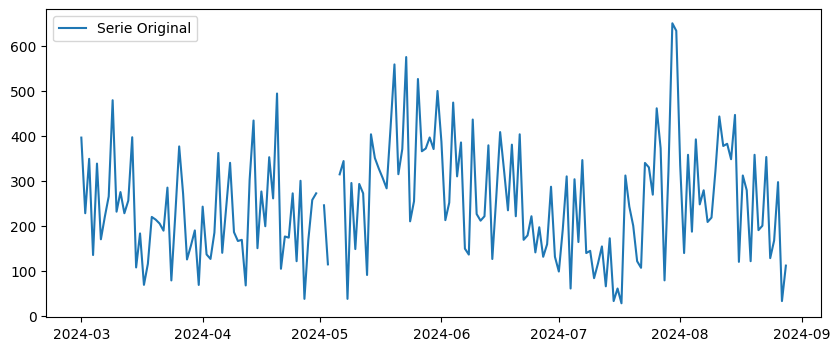

In [11]:
# Gráfica
plt.figure(figsize=(10, 4))
plt.plot(time, label='Serie Original')
plt.legend()
plt.show()

<ipython-input-13-91ee916a1760>:3: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  time_filled = time.fillna(method='ffill')  # Forward fill missing values


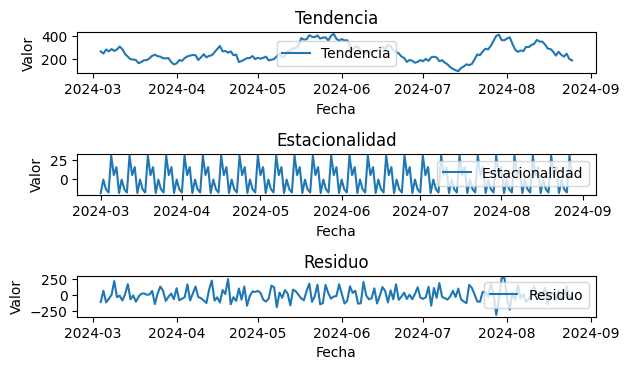

In [13]:
# Descomposición
# Handle missing values before decomposition, e.g., by filling them
time_filled = time.fillna(method='ffill')  # Forward fill missing values

decomposition = seasonal_decompose(time_filled, model='additive')

# Tendencia
plt.subplot(412)
plt.plot(decomposition.trend, label='Tendencia')
plt.title('Tendencia')
plt.xlabel('Fecha')
plt.ylabel('Valor')
plt.legend()

# Estacionalidad
plt.subplot(413)
plt.plot(decomposition.seasonal, label='Estacionalidad')
plt.title('Estacionalidad')
plt.xlabel('Fecha')
plt.ylabel('Valor')
plt.legend()

# Residuo
plt.subplot(414)
plt.plot(decomposition.resid, label='Residuo')
plt.title('Residuo')
plt.xlabel('Fecha')
plt.ylabel('Valor')
plt.legend()

plt.tight_layout()
plt.show()

In [29]:
split_date = '2024-04-30'
train_data = time[:split_date]
test_data = time[split_date:]

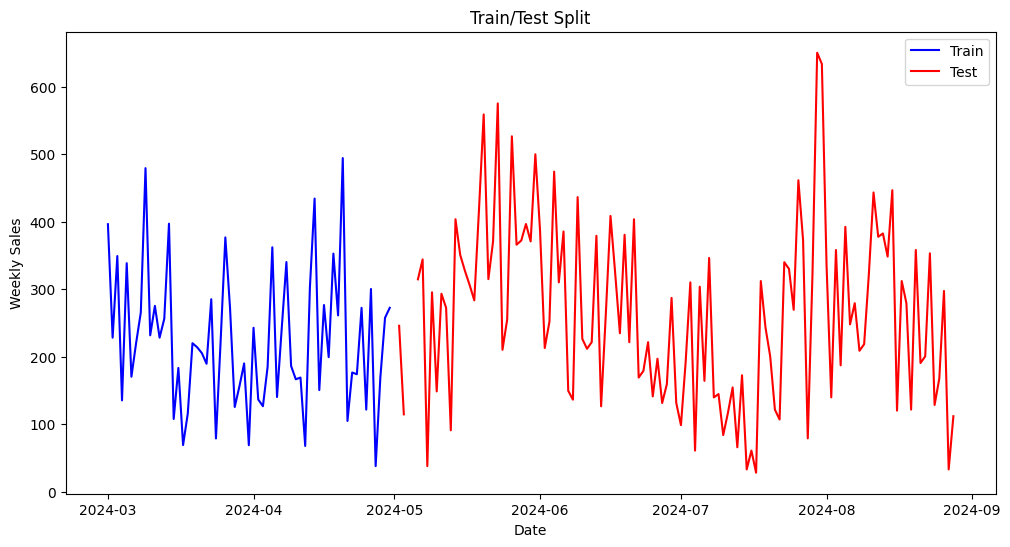

In [30]:
# Datos
plt.figure(figsize=(12, 6))
plt.plot(train_data, label='Train', color='blue')
plt.plot(test_data, label='Test', color='red')
plt.title('Train/Test Split')
plt.xlabel('Date')
plt.ylabel('Weekly Sales')
plt.legend()
plt.show()

In [31]:
# Modelo ARIMA
model = ARIMA(train_data, order=(10, 1, 10))
model_fit = model.fit()

# Pronóstico
forecast = model_fit.forecast(steps=len(test_data))

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


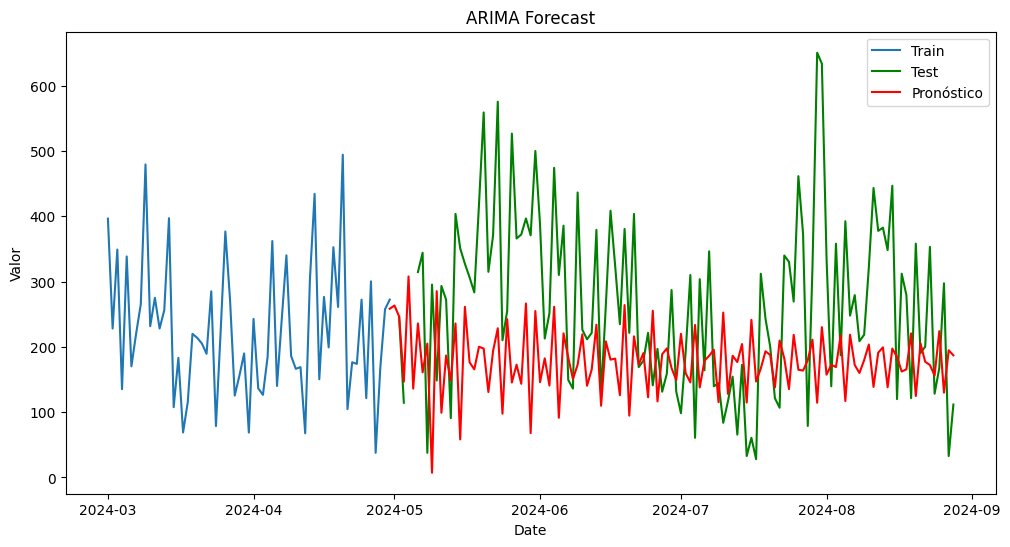

In [32]:
# Gráfica
plt.figure(figsize=(12, 6))
plt.plot(train_data, label='Train')
plt.plot(test_data, label='Test', color='green')
plt.plot(test_data.index, forecast, label='Pronóstico', color='red')
plt.legend()
plt.title('ARIMA Forecast')
plt.xlabel('Date')
plt.ylabel('Valor')
plt.show()

In [33]:
# Check for NaN values in the forecast
print(forecast.isnull().values.any())

False


In [40]:
df.isnull().sum()

,0
datetime,3
cash_type,3
card,3
money,3
coffee_name,3


In [41]:
df=df.dropna()

In [42]:
df.isnull().sum()

,0
datetime,0
cash_type,0
card,0
money,0
coffee_name,0


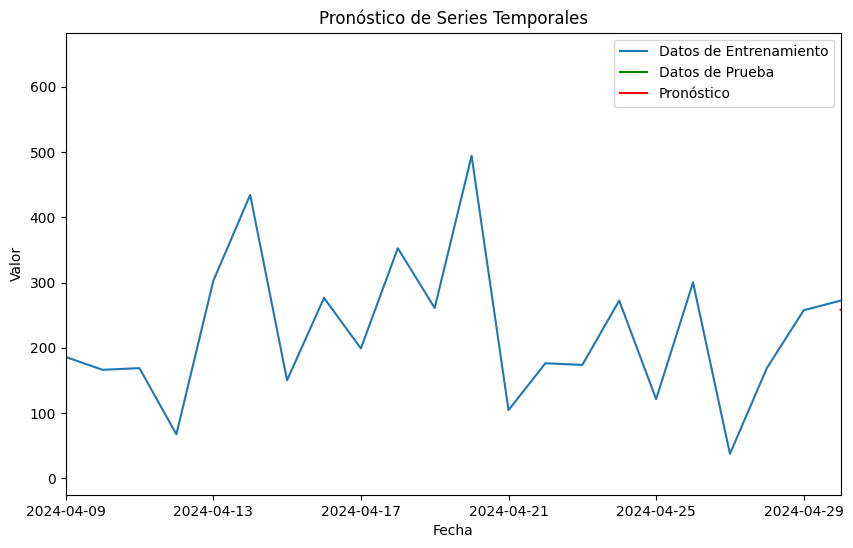

In [44]:
# Crear el gráfico
plt.figure(figsize=(10, 6))

# Datos de entrenamiento y prueba
plt.plot(train_data, label='Datos de Entrenamiento')
plt.plot(test_data, label='Datos de Prueba', color='green')
plt.plot(test_data.index, forecast, label='Pronóstico', color='red')
inicio = pd.to_datetime('2024-04-09')
fin = pd.to_datetime('2024-04-30')
plt.xlim(inicio,fin)

plt.legend()
plt.title('Pronóstico de Series Temporales')
plt.xlabel('Fecha')
plt.ylabel('Valor')
plt.show()

Longitud de train_data: 121
Longitud de errors: 122


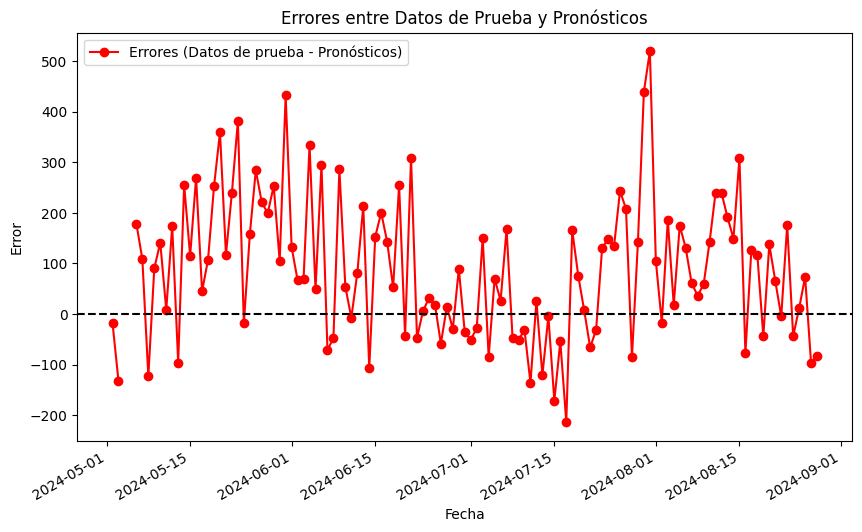

In [46]:
# Calcular los errores (residuales) entre los datos reales y los pronósticos
errors = test_data - forecast

print(f"Longitud de train_data: {len(train_data)}")
print(f"Longitud de errors: {len(errors)}")

# Asegurar que train_data y errors tengan la misma longitud
min_length = min(len(test_data), len(errors))
train_data = test_data[:min_length]
errors = errors[:min_length]

# Graficar los errores
plt.figure(figsize=(10, 6))
plt.plot(test_data.index, errors, marker='o', linestyle='-', color='red', label='Errores (Datos de prueba - Pronósticos)')
plt.title('Errores entre Datos de Prueba y Pronósticos')
plt.xlabel('Fecha')
plt.ylabel('Error')
plt.axhline(y=0, color='black', linestyle='--')  # Línea horizontal en y=0 para referencia
plt.legend()
plt.gcf().autofmt_xdate()

plt.show()